Purpose : Classify images in SVHN dataset according to digits in image.

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#Import required libraries
import pandas as pd
import os
import h5py
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [0]:
os.chdir('//content//gdrive//My Drive//Colab Notebooks//')

In [0]:
#Read dataset file
images=h5py.File('SVHN_single_grey1.h5',mode='r')

In [77]:
#Keys present in h5 file
print(list(images.keys()))

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


In [0]:
#Store data from dataset file
X_train=images['X_train']
X_test=images['X_test']

Y_train=images['y_train']
Y_test=images['y_test']


In [79]:
#Shape of train data
X_train.shape

(42000, 32, 32)

In [0]:
#Shape of test data
X_test.shape

(18000, 32, 32)

In [80]:
#Find out number of classes
np.bincount(Y_train).shape

(10,)

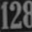

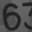

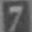

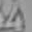

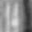

In [0]:
#Visualize Images
for i in range(5):
  cv2_imshow(X_train[i])

In [0]:
#Normalize the data
X_train=X_train[:]/255

In [0]:
#Reshape the data
X_train_Reshape=X_train.reshape(X_train.shape[0],32*32)

In [83]:
#Check Shape of Reshaped Data
X_train_Reshape[0].shape

(1024,)

In [0]:
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

In [0]:
knn=KNeighborsClassifier(n_neighbors=5,weights='distance',metric='euclidean')

In [0]:
knn.fit(X_train_Reshape,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [0]:
#Normalize test data for prediction
X_test=X_test[:]/255

In [0]:
#reshape test data
X_test_Reshape=X_test.reshape(X_test.shape[0],32*32)

In [86]:
#Check shape of reshaped test data
X_test_Reshape.shape

(18000, 1024)

In [0]:
Y_predict=knn.predict(X_test_Reshape)

In [0]:
#Print Accuracy
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(Y_test,Y_predict)


0.5086111111111111

In [0]:
confusion_matrix(Y_test,Y_predict)

array([[1041,   39,   40,   50,   55,   60,  164,   45,  145,  175],
       [  59, 1192,   88,   98,  108,   58,   55,   89,   42,   39],
       [  55,  160,  925,  129,   59,   64,   46,  173,   87,  105],
       [  79,  182,  121,  695,   75,  205,   58,   68,  129,  107],
       [  78,  186,   35,   53, 1165,   41,   88,   30,   74,   62],
       [  92,  108,   60,  223,   57,  671,  175,   46,  185,  151],
       [ 218,   84,   42,   72,  115,  156,  767,   29,  268,   81],
       [  69,  184,  111,   71,   28,   32,   35, 1154,   43,   81],
       [ 191,   75,   48,  104,   85,  126,  254,   33,  740,  156],
       [ 244,  103,   62,  105,   55,   95,   99,   64,  172,  805]])

In [0]:
#Neural Network
import keras
from keras.layers import Dense,Activation,BatchNormalization,Dropout
from keras.models import Sequential
from keras.optimizers import sgd,adam

In [0]:
#One hot encoding of labels
Y_train_OHE=pd.get_dummies(Y_train)
Y_test_OHE=pd.get_dummies(Y_test)

In [89]:
#Check shape
Y_train_OHE.shape

(42000, 10)

In [0]:
#Network Architecture
model=Sequential()
model.add(Dense(1000,input_shape=(1024,),activation='relu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(800,activation='relu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dense(10,activation='softmax'))

In [120]:
#Complie and fit model to training data and check accuracy on test data
opt=adam(lr=0.00001)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model.fit(X_train_Reshape,Y_train_OHE,nb_epoch=50,validation_data=(X_test_Reshape,Y_test_OHE),batch_size=32)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 42000 samples, validate on 18000 samples
Epoch 1/50
42000/42000 [==============================] - 15s 348us/step - loss: 0.9978 - acc: 0.6847 - val_loss: 0.8561 - val_acc: 0.7482
Epoch 2/50
42000/42000 [==============================] - 11s 256us/step - loss: 0.9582 - acc: 0.7027 - val_loss: 0.8378 - val_acc: 0.7532
Epoch 3/50
42000/42000 [==============================] - 11s 255us/step - loss: 0.9292 - acc: 0.7089 - val_loss: 0.8209 - val_acc: 0.7584
Epoch 4/50
42000/42000 [==============================] - 11s 257us/step - loss: 0.8978 - acc: 0.7194 - val_loss: 0.7990 - val_acc: 0.7652
Epoch 5/50
42000/42000 [==============================] - 11s 259us/step - loss: 0.8820 - acc: 0.7250 - val_loss: 0.7810 - val_acc: 0.7707
Epoch 6/50
42000/42000 [==============================] - 11s 256us/step - loss: 0.8607 - acc: 0.7313 - val_loss: 0.7623 - val_acc: 0.7769
Epoch 7/50
42000/42000 [==============================] - 11s 253us/step - loss: 0.8347 - acc: 0.7415 - val_loss: 0.

Accuracy of neural network model is  better than knn model for SVHN dataset.